# `Load payback prediction`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

`Load Datasets`

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

`shape of data`

In [3]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (593994, 13)
Test shape: (254569, 12)


`first five rows`

In [4]:
train.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


`last five rows`

In [5]:
train.tail()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0
593993,593993,48959.52,0.096,752,7707.73,10.31,Male,Married,High School,Employed,Education,B3,1.0


`check Missing Values`

In [6]:
print("="*30)
print("| 'Missing values in dataset':|")
print("="*30)
print(test.isnull().sum())

| 'Missing values in dataset':|
id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64


`Check Duplicate`

In [7]:
print("="*35)
print("Drop Duplicated rows in train dataset:")
train.drop_duplicates(inplace=True)
print("New shape of train dataset:", train.shape)
print("="*35)

Drop Duplicated rows in train dataset:
New shape of train dataset: (593994, 13)


`Statistical analysis`

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,593994.0,296996.500000,171471.442236,0.000,148498.250,296996.500,445494.750,593993.000
annual_income,593994.0,48212.202976,26711.942078,6002.430,27934.400,46557.680,60981.320,393381.740
debt_to_income_ratio,593994.0,0.120696,0.068573,0.011,0.072,0.096,0.156,0.627
credit_score,593994.0,680.916009,55.424956,395.000,646.000,682.000,719.000,849.000
loan_amount,593994.0,15020.297629,6926.530568,500.090,10279.620,15000.220,18858.580,48959.950
interest_rate,593994.0,12.356345,2.008959,3.200,10.990,12.370,13.680,20.990
loan_paid_back,593994.0,0.798820,0.400883,0.000,1.000,1.000,1.000,1.000


# `Visualication analysis`

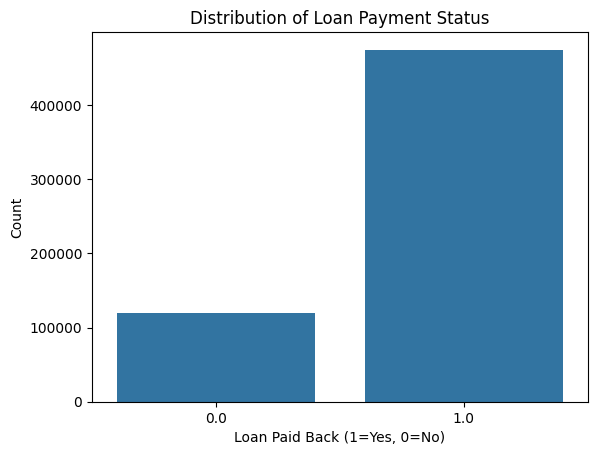

In [9]:
sns.countplot(x="loan_paid_back", data=train)
plt.title("Distribution of Loan Payment Status")
plt.xlabel("Loan Paid Back (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

`interest_rate and loan_amount`

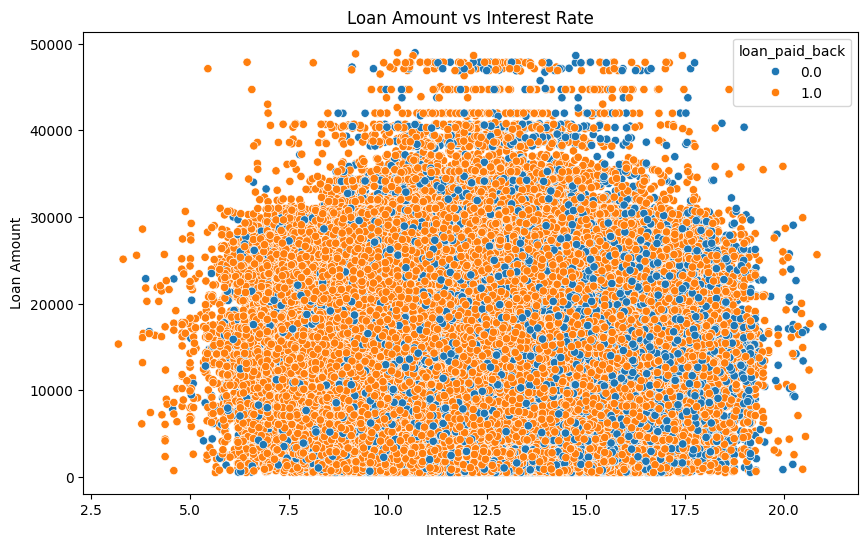

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='interest_rate', y='loan_amount', hue='loan_paid_back', data=train)
plt.title("Loan Amount vs Interest Rate")
plt.xlabel("Interest Rate")
plt.ylabel("Loan Amount")
plt.show()

`Annual_Income and loan_amount`

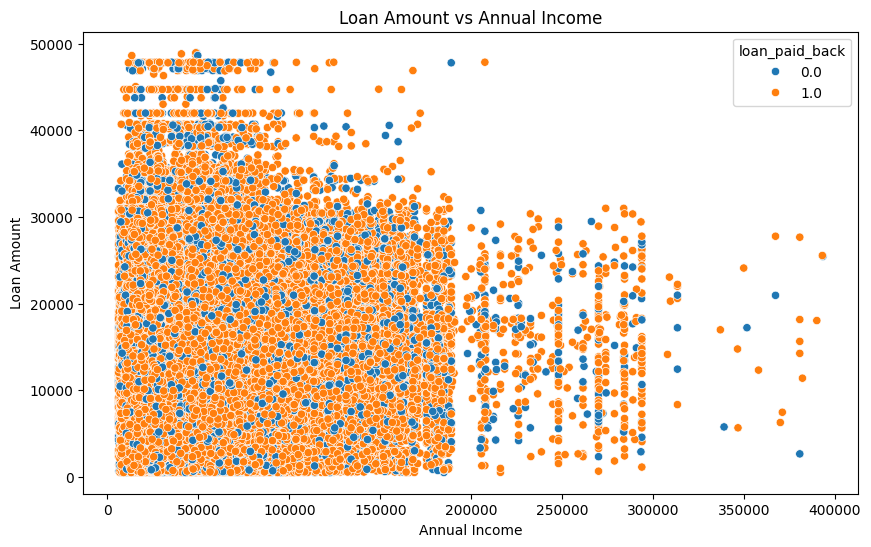

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='loan_amount', hue='loan_paid_back', data=train)
plt.title("Loan Amount vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()

`Gender wise loan paid back`

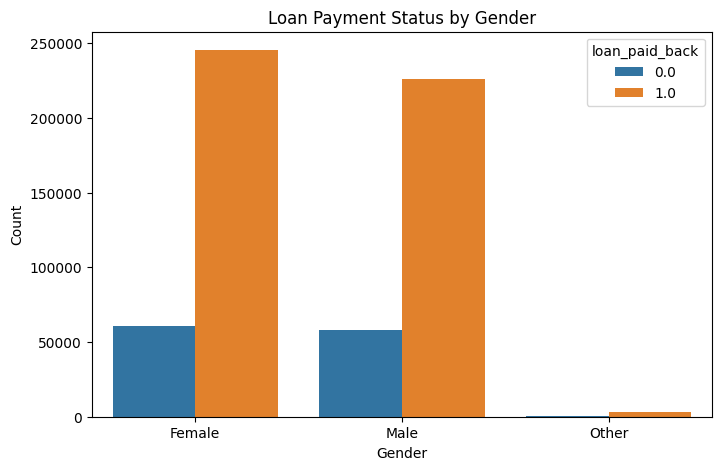

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", hue="loan_paid_back", data=train)
plt.title("Loan Payment Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

`Annual Income Distribution`

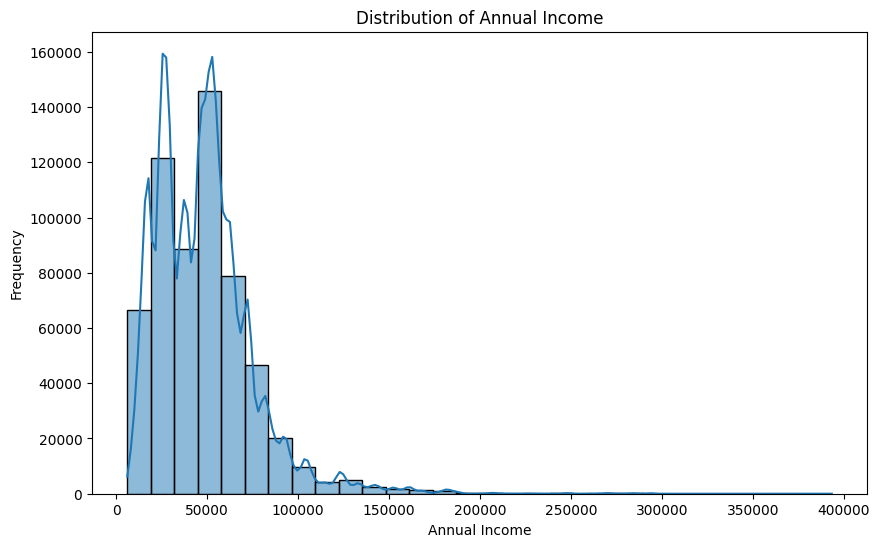

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(train['annual_income'], bins=30, kde=True)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

`Outliers Detection`

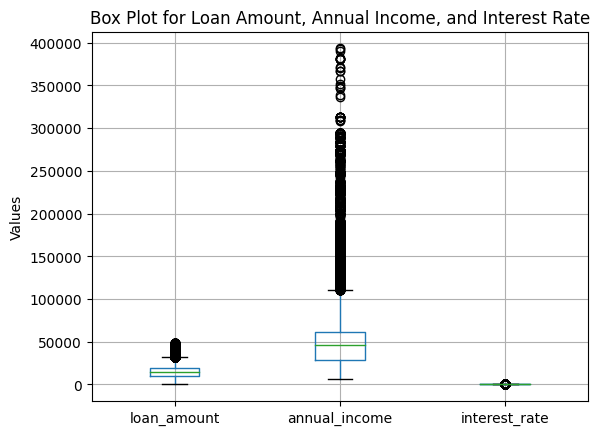

In [14]:
boxplot = train.boxplot(column=['loan_amount', 'annual_income', 'interest_rate'])
plt.title("Box Plot for Loan Amount, Annual Income, and Interest Rate")
plt.ylabel("Values")
plt.show()

`outliers removed`

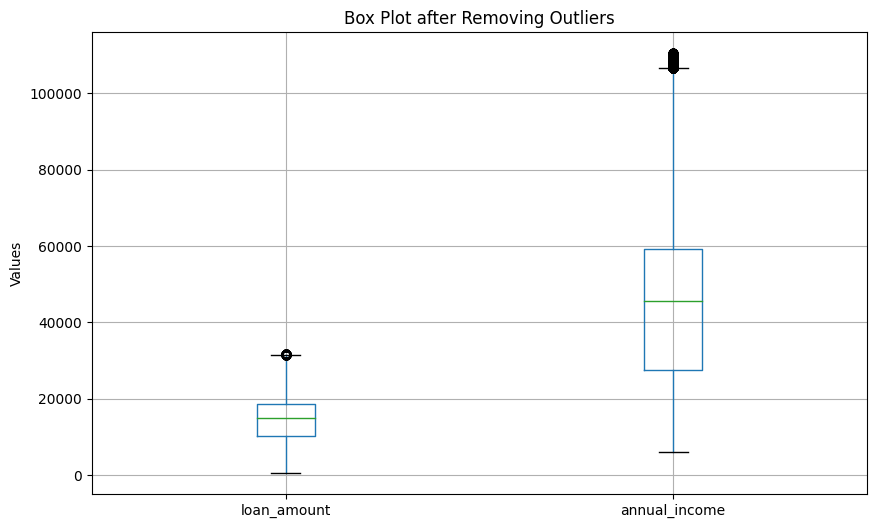

In [15]:
column=['loan_amount', 'annual_income']

train = train.copy()

for col in column:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]

# Create the box plot
plt.figure(figsize=(10, 6))
graph = train.boxplot(column=column)
plt.title("Box Plot after Removing Outliers")
plt.ylabel("Values")
plt.show()

`Import Machine learning libraries`

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

`Encode our data string to binary`

In [17]:
combine = [train, test]
le = LabelEncoder()

# find object columns that exist in both train and test
obj_cols = train.select_dtypes(include='object').columns.intersection(
    test.select_dtypes(include='object').columns
)

for col in obj_cols:
    combined_vals = pd.concat([train[col], test[col]], axis=0).astype(str)
    le.fit(combined_vals)
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

`Feature Selection`

In [18]:
x=train.drop(columns=["id","loan_paid_back"],axis=1)
y=train["loan_paid_back"]

`Train Test Split`

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# `Fit Model`

- `Dission Tree`

In [28]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred))

accuracy_score:  0.8463343618269523
confusion_matrix: 
 [[14819  8215]
 [ 9465 82556]]


- `Random Forest`

In [29]:
rf=RandomForestClassifier(random_state=42,n_estimators=10,n_jobs=-2)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("confusion_matrix:\n ",confusion_matrix(y_test,y_pred))

accuracy_score:  0.8941202033809917
confusion_matrix:
  [[14641  8393]
 [ 3789 88232]]


- `XGBRegressor`

In [37]:
xgb=XGBClassifier(n_jobs=-2,random_state=42)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred))

accuracy_score:  0.9044109339011777
confusion_matrix: 
 [[14038  8996]
 [ 2002 90019]]


`Hyperparameter Tunning`

In [ ]:
xg =XGBClassifier(verbose=0)
param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    }
grid_search = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-2, 
                           scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [10:27:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "depth", "iterations", "l2_leaf_reg", "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found:  {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.2}


In [40]:
best_xgb = grid_search.best_estimator_
xgb_best=XGBClassifier(**grid_search.best_params_, verbose=0)
xgb_best.fit(x_train, y_train)
y_pred=xgb_best.predict(x_test)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [10:29:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "depth", "iterations", "l2_leaf_reg", "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [41]:
print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred))

accuracy_score:  0.9050193385772022
confusion_matrix: 
 [[13913  9121]
 [ 1807 90214]]


# `Final Submission`

In [ ]:
test_features = test.drop('id', axis=1)
submission = xgb_best.predict(test_features)

# Create submission dataframe
sample_submission = pd.DataFrame({
    "id": test.id,
    "submission": submission
})
sample_submission

,id,submission
0,593994,1
1,593995,1
2,593996,0
3,593997,1
4,593998,1
...,...,...
254564,848558,1
254565,848559,1
254566,848560,1
254567,848561,1


In [44]:
sample_submission.to_csv("sample_submission.csv")